# E-Commerce ELT Pipeline


💡 Want a step-by-step walkthrough instead?

You can check the Jupyter notebook version here: 👉 [Jupyter version](https://huggingface.co/spaces/iBrokeTheCode/E-Commerce_ELT/blob/main/tutorial_app.ipynb)


## 1. Description


This project analyzes e-commerce data from a Brazilian marketplace to explore key business metrics related to **revenue** and **delivery performance**. Using an interactive Marimo application, the analysis provides insights into:

- **Revenue:** Annual revenue, popular product categories, and sales by state.
- **Delivery:** Delivery performance, including time-to-delivery and its correlation with public holidays.

The data pipeline processes information from multiple CSV files and a public API, storing and analyzing the results using Python. The final interactive report is presented as a Hugging Face Space built with Marimo.


## 2. ETL


In [26]:
from pandas import DataFrame
from pathlib import Path
from sqlalchemy import create_engine

from src import config
from src.extract import extract
from src.load import load
from src.transform import QueryEnum, run_queries

### 2.1 Extract and Load


In [27]:
DB_PATH = Path(config.SQLITE_DB_ABSOLUTE_PATH)

if DB_PATH.exists() and DB_PATH.stat().st_size > 0:
    print("Database found. Skipping ETL process.")
    ENGINE = create_engine(f"sqlite:///{DB_PATH}", echo=False)
else:
    print("Database not found or empty. Starting ETL process...")
    ENGINE = create_engine(f"sqlite:///{DB_PATH}", echo=False)

    csv_dataframes = extract(
        csv_folder=config.DATASET_ROOT_PATH,
        csv_table_mapping=config.get_csv_to_table_mapping(),
        public_holidays_url=config.PUBLIC_HOLIDAYS_URL,
    )

    load(dataframes=csv_dataframes, database=ENGINE)
    print("ETL process complete.")

Database found. Skipping ETL process.


### 2.2 Transform


In [28]:
query_results: dict[str, DataFrame] = run_queries(database=ENGINE)

**A. Revenue by Month and Year**


In [29]:
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,37632.57,969967.80
1,02,Feb,0.00,222270.75,853616.82
2,03,Mar,0.00,376833.72,1024851.95
3,04,Apr,0.00,299798.45,1274742.18
4,05,May,0.00,579280.43,1150528.93
5,06,Jun,0.00,489463.42,1141543.85
6,07,Jul,0.00,518115.19,925958.79
7,08,Aug,0.00,609180.34,1319737.66
8,09,Sep,0.00,652576.48,12875.18
9,10,Oct,34116.28,740570.40,347.95


**B. Top 10 Revenue by categories**


In [ ]:
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8646,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


**C. Top 10 Least Revenue by Categories**


In [31]:
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


**D. Revenue per State**


In [32]:
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


**E. Delivery Date Difference**


In [ ]:
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERENCE.value]
delivery_date_difference

,State,Delivery_Difference
0,AL,8
1,MA,9
2,BA,10
3,CE,10
4,ES,10
5,SE,10
6,MS,11
7,PI,11
8,RJ,11
9,SC,11


**F. Real vs. Predicted Delivered Time**


In [34]:
real_vs_estimated_delivery_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivery_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,12.647044,14.080563,NaN,39.508831,26.302555
1,02,Feb,NaN,13.168825,16.945138,NaN,31.848929,24.528996
2,03,Mar,NaN,12.951184,16.301410,NaN,24.732386,22.033067
3,04,Apr,NaN,14.917913,11.499241,NaN,27.349810,23.679546
4,05,May,NaN,11.322363,11.419029,NaN,24.284784,22.891488
5,06,Jun,NaN,12.011573,9.239216,NaN,24.021864,27.772740
6,07,Jul,NaN,11.592732,8.958636,NaN,23.317316,19.690127
7,08,Aug,NaN,11.147125,7.732780,NaN,23.480603,15.186330
8,09,Sep,54.813194,11.851007,NaN,18.488449,22.437366,NaN
9,10,Oct,19.600559,11.856700,NaN,55.676632,23.019536,NaN


**G. Global Amount of Order Status**


In [ ]:
global_amount_order_status = query_results[QueryEnum.GLOBAL_AMOUNT_ORDER_STATUS.value]
global_amount_order_status

,order_status,Amount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


**H. Orders per Day and Holidays in 2017**


In [36]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,order_count,date,holiday
0,32,1483574400000,False
1,4,1483660800000,False
2,4,1483747200000,False
3,6,1483833600000,False
4,5,1483920000000,False
...,...,...,...
356,167,1514332800000,False
357,146,1514419200000,False
358,135,1514505600000,False
359,97,1514592000000,False


**I. Freight Value Weight Relationship**


In [37]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]
freight_value_weight_relationship

,order_id,freight_value,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0
2,000229ec398224ef6ca0657da4fc703e,17.87,3050.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,43.41,10150.0
96474,fffcd46ef2263f404302a634eb57f7eb,36.53,8950.0
96475,fffce4705a9662cd70adb13d4a31832d,16.95,967.0
96476,fffe18544ffabc95dfada21779c9644f,8.72,100.0


## 3. Plots


In [38]:
from src.plots import (
    plot_revenue_by_month_year,
    plot_real_vs_predicted_delivered_time,
    plot_global_amount_order_status,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories_amount,
    plot_top_10_revenue_categories,
    plot_freight_value_weight_relationship,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

**A. Revenue by Month in 2017**


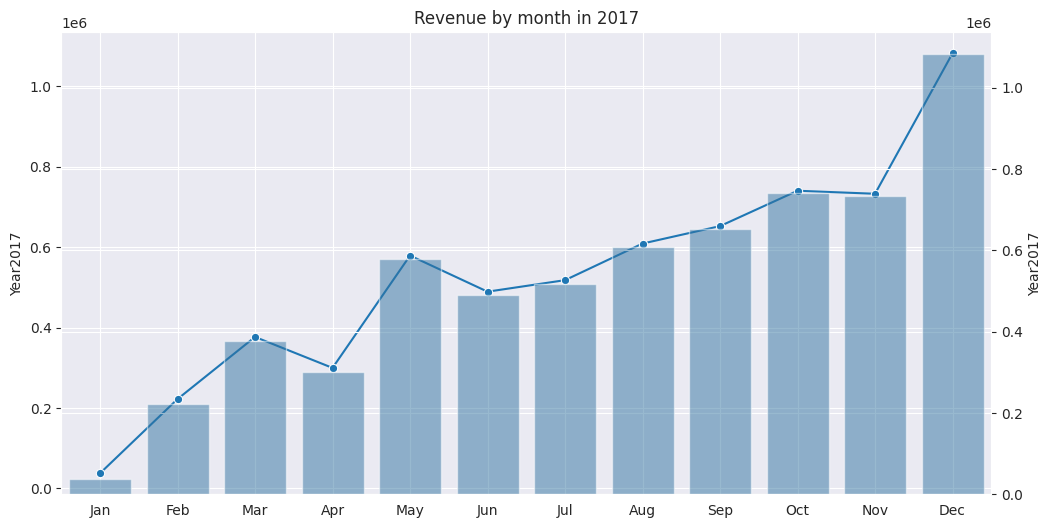

In [39]:
plot_revenue_by_month_year(df=revenue_by_month_year, year=2017)

**B. Real vs. Predicted Delivered Time**


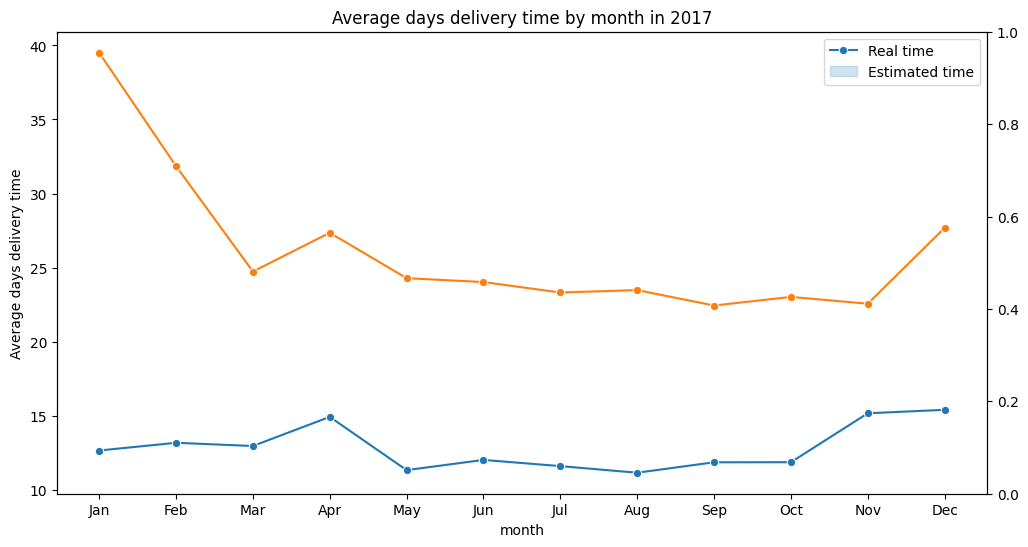

In [ ]:
plot_real_vs_predicted_delivered_time(df=real_vs_estimated_delivery_time, year=2017)

**C. Global Amount of Order Status**


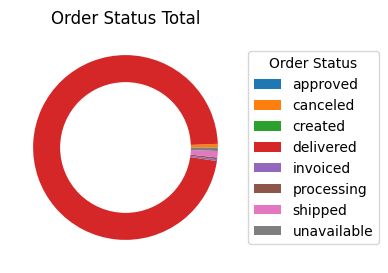

In [41]:
plot_global_amount_order_status(df=global_amount_order_status)

**D. Revenue per State**


In [42]:
plot_revenue_per_state(df=revenue_per_state)

**E. Top 10 Least Revenue by Categories**


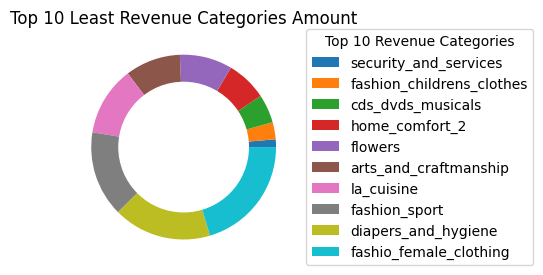

In [43]:
plot_top_10_least_revenue_categories(df=top_10_least_revenue_categories)

**F. Top 10 Revenue Categories Amount**


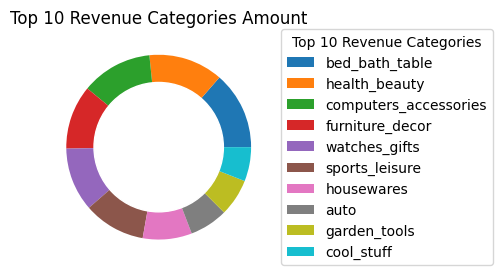

In [44]:
plot_top_10_revenue_categories_amount(df=top_10_revenue_categories)

**G. Top 10 Revenue by Categories**


In [45]:
plot_top_10_revenue_categories(df=top_10_revenue_categories)

**H. Freight Value vs. Product Weight**


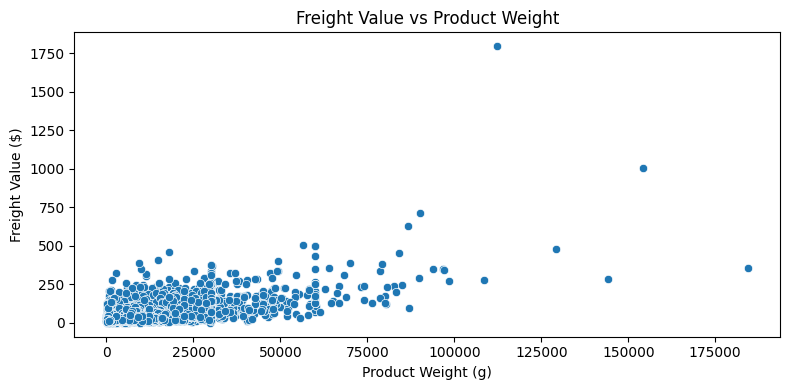

In [46]:
plot_freight_value_weight_relationship(df=freight_value_weight_relationship)

**I. Diffrence Between Deliver Estimated Date and Delivery Date**


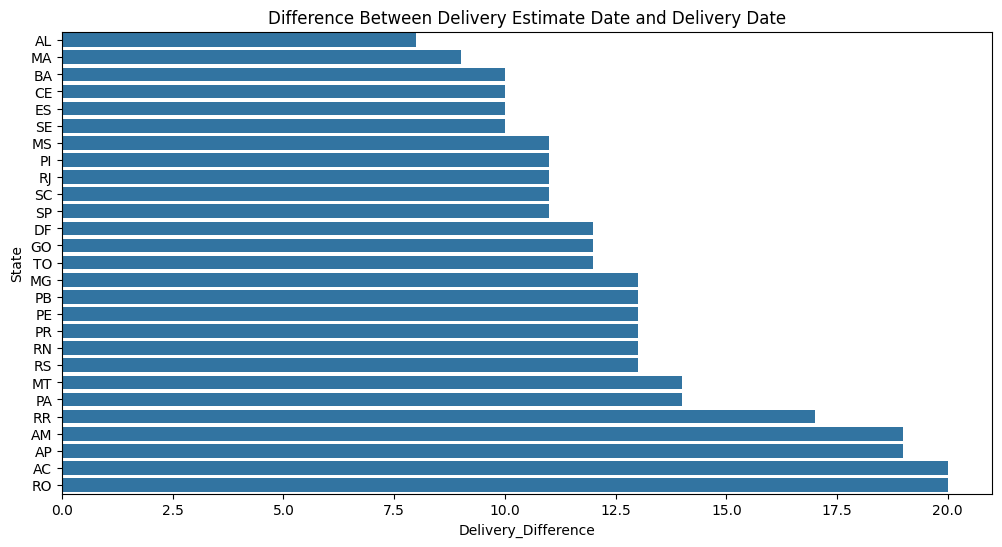

In [47]:
plot_delivery_date_difference(df=delivery_date_difference)

**J. Order Amount per Day with Holidays**


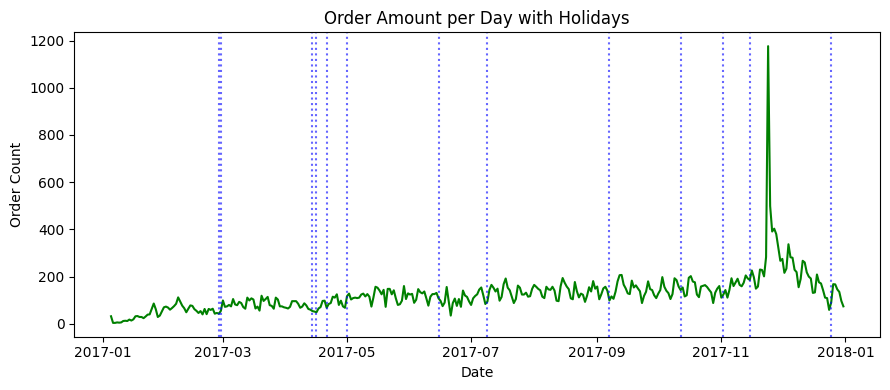

In [48]:
plot_order_amount_per_day_with_holidays(df=orders_per_day_and_holidays)